<a href="https://colab.research.google.com/github/maferrepy/Desafio_RH/blob/main/desafio_rh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np


In [8]:
df = pd.read_excel('/content/sample_data/Base_dados - Rotatividade RH.xlsx')

# Visualizando os Dados

In [9]:
def atualizar_data_desligamento(df):
    hoje = pd.to_datetime(datetime.today().date())
    df['Data_Desligamento'].fillna(hoje, inplace=True)


atualizar_data_desligamento(df)


df.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,2024-05-22,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,2024-05-22,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,2024-05-22,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,2024-05-22,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0


In [10]:
df['Horas_Extras'] = df['Horas_Extras'].round()

In [11]:
df_senior = df[df['Nivel_Cargo'] == 'Sênior']

In [12]:
df_senior.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.0,1
2,2023-11-16,2024-05-22,6,45,4.827732,3.480214,Sênior,8891.02,13.0,0
4,2022-07-24,2024-05-22,22,37,2.088917,2.763390,Sênior,9236.03,11.0,0
5,2022-05-25,2024-05-14,24,43,4.328231,3.209761,Sênior,10466.00,14.0,1
8,2022-02-24,2024-05-22,27,44,1.549005,2.067783,Sênior,7780.41,2.0,0


In [13]:
# criando um nodf so com os que foram deligados
df_pediram_a_conta = df[df['Desligamento'] == 1]

In [14]:
df_pediram_a_conta.head().info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1 to 20
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      5 non-null      datetime64[ns]
 1   Data_Desligamento     5 non-null      datetime64[ns]
 2   Meses_de_Servico      5 non-null      int64         
 3   Idade                 5 non-null      int64         
 4   Pontuacao_Desempenho  5 non-null      float64       
 5   Satisfacao_Trabalho   5 non-null      float64       
 6   Nivel_Cargo           5 non-null      object        
 7   Salario               5 non-null      float64       
 8   Horas_Extras          5 non-null      float64       
 9   Desligamento          5 non-null      int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 440.0+ bytes


In [15]:
df_senior['Desligamento'].value_counts()

Desligamento
0    149
1     43
Name: count, dtype: int64

In [16]:
df_desligamento = df_senior[df_senior['Desligamento'] == 1]

In [17]:
df_desligamento.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.0,1
5,2022-05-25,2024-05-14,24,43,4.328231,3.209761,Sênior,10466.00,14.0,1
23,2024-02-14,2024-05-14,3,43,4.756251,2.832583,Sênior,11346.51,14.0,1
38,2021-10-27,2024-05-14,31,38,3.158602,3.572795,Sênior,10602.25,20.0,1
42,2022-09-22,2024-05-14,20,49,4.235481,1.614330,Sênior,11917.59,22.0,1


In [18]:
df_desligamento.describe()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Salario,Horas_Extras,Desligamento
count,43,43,43.00000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0
mean,2022-11-04 06:08:22.325581312,2024-05-14 00:00:00,18.55814,38.139535,3.520831,2.588305,9492.402791,19.674419,1.0
min,2021-06-29 00:00:00,2024-05-14 00:00:00,3.00000,27.000000,1.136984,1.221542,7027.600000,5.000000,1.0
25%,2022-03-11 00:00:00,2024-05-14 00:00:00,10.50000,32.500000,2.829068,2.059055,8080.995000,14.500000,1.0
50%,2022-11-21 00:00:00,2024-05-14 00:00:00,18.00000,39.000000,3.687378,2.563417,9635.860000,19.000000,1.0
75%,2023-07-04 00:00:00,2024-05-14 00:00:00,26.50000,43.000000,4.541496,3.236103,10965.755000,22.500000,1.0
max,2024-02-14 00:00:00,2024-05-14 00:00:00,35.00000,49.000000,4.941439,3.935051,11932.740000,42.000000,1.0
std,NaN,NaN,10.19641,6.166659,1.111533,0.783705,1705.726288,7.256265,0.0


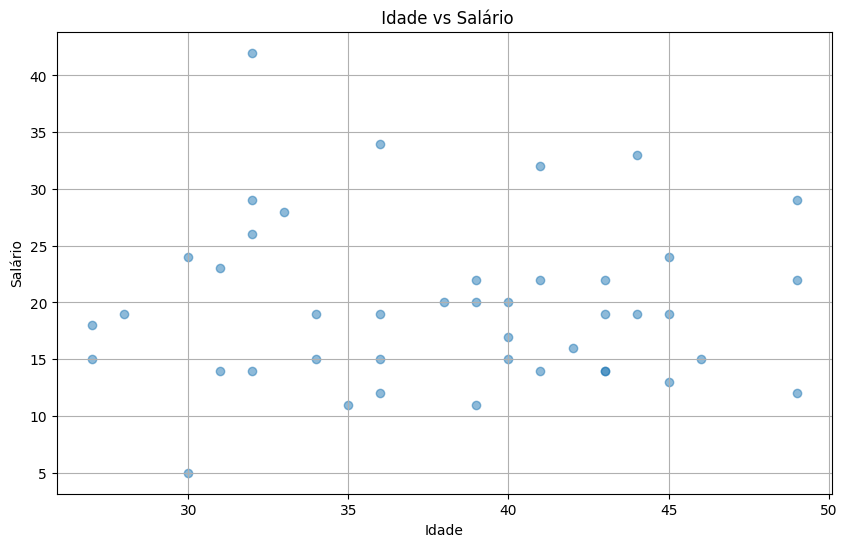

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df_desligamento['Idade'], df_desligamento['Horas_Extras'], alpha=0.5)
plt.title(' Idade vs Salário')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.grid(True)
plt.show()

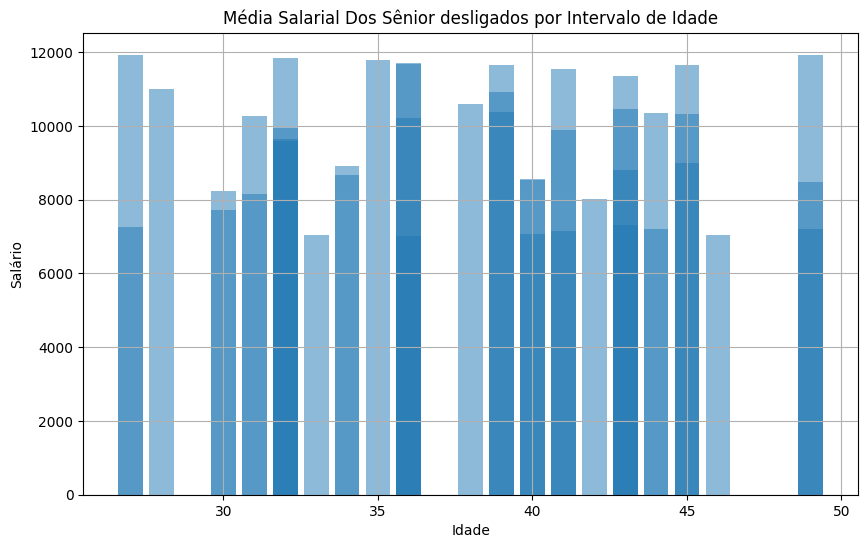

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(df_desligamento['Idade'], df_desligamento['Salario'], alpha=0.5)
plt.title('Média Salarial Dos Sênior desligados por Intervalo de Idade')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.grid(True)
plt.show()

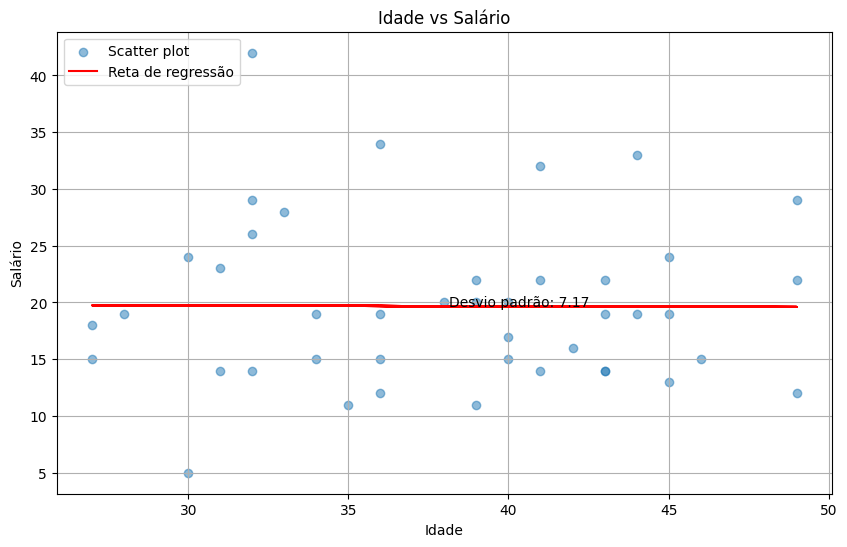

In [21]:


# Calcula os coeficientes da reta de melhor ajuste
coef = np.polyfit(df_desligamento['Idade'], df_desligamento['Horas_Extras'], 1)

# Cria a função da reta
f = np.poly1d(coef)

# Calcula os resíduos da regressão
residuals = df_desligamento['Horas_Extras'] - f(df_desligamento['Idade'])

# Calcula o desvio padrão dos resíduos
std_dev = np.std(residuals)

# Plota a reta
plt.figure(figsize=(10, 6))
plt.scatter(df_desligamento['Idade'], df_desligamento['Horas_Extras'], alpha=0.5)
plt.plot(df_desligamento['Idade'], f(df_desligamento['Idade']), '-r')
plt.title('Idade vs Salário')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.grid(True)

# Adiciona uma legenda
plt.legend(['Scatter plot', 'Reta de regressão'], loc='upper left')

# Adiciona o desvio padrão como texto na figura
plt.text(df_desligamento['Idade'].mean(), df_desligamento['Horas_Extras'].mean(),
          f'Desvio padrão: {std_dev:.2f}', fontsize=10)

plt.show()

In [22]:
df_senior['Salario'].describe()

count      192.000000
mean      9496.988646
std       1545.201484
min       7027.600000
25%       8175.410000
50%       9448.300000
75%      10926.557500
max      11957.290000
Name: Salario, dtype: float64

In [23]:
df['Data_Desligamento'].value_counts()


Data_Desligamento
2024-05-22    506
2024-05-14    144
Name: count, dtype: int64

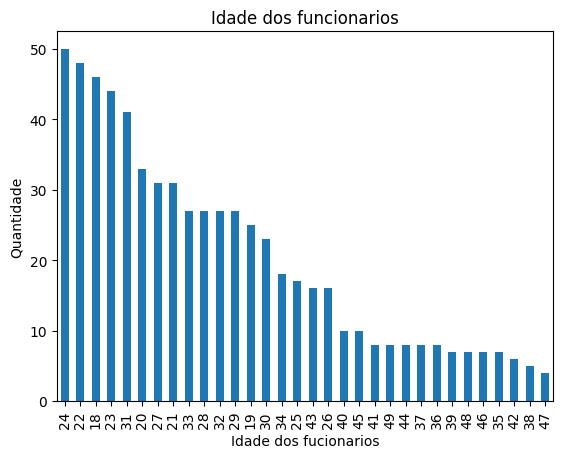

In [24]:

df['Idade'].value_counts().plot(kind='bar')
plt.title('Idade dos funcionarios')
plt.xlabel('Idade dos fucionarios')
plt.ylabel('Quantidade')
plt.show()


In [25]:
df['Data_Contratacao'].value_counts().sort_index(ascending=False)



Data_Contratacao
2024-02-14    24
2024-01-15    18
2023-12-16    16
2023-11-16    31
2023-10-17    17
2023-09-17    26
2023-08-18    20
2023-07-19    22
2023-06-19    18
2023-05-20    21
2023-04-20    20
2023-03-21    15
2023-02-19    22
2023-01-20    16
2022-12-21    13
2022-11-21    18
2022-10-22    21
2022-09-22    18
2022-08-23    20
2022-07-24    23
2022-06-24    23
2022-05-25    15
2022-04-25    15
2022-03-26    22
2022-02-24    21
2022-01-25    18
2021-12-26    19
2021-11-26    21
2021-10-27    19
2021-09-27    23
2021-08-28    25
2021-07-29    12
2021-06-29    18
Name: count, dtype: int64

# Virificando o tamanho do Data Frame

In [26]:
df.shape



(650, 10)

# verificar valores faltantes.

In [27]:
df.isna().sum()

Data_Contratacao        0
Data_Desligamento       0
Meses_de_Servico        0
Idade                   0
Pontuacao_Desempenho    0
Satisfacao_Trabalho     0
Nivel_Cargo             0
Salario                 0
Horas_Extras            0
Desligamento            0
dtype: int64

In [28]:
df['Pontuacao_Desempenho'].describe()

count    650.000000
mean       3.027463
std        1.174226
min        1.000242
25%        1.988753
50%        3.058911
75%        4.022709
max        4.992102
Name: Pontuacao_Desempenho, dtype: float64

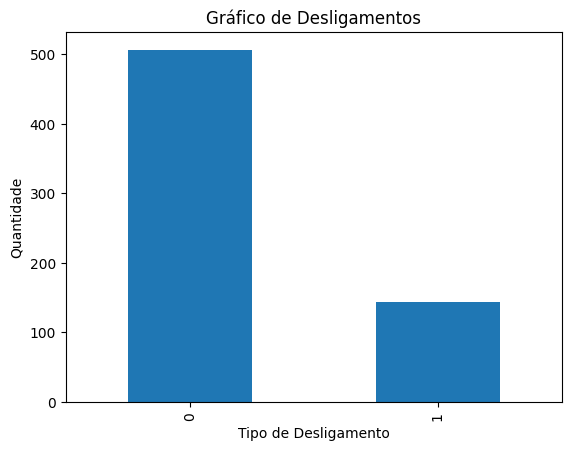

In [29]:


df['Desligamento'].value_counts().plot(kind='bar')
plt.title('Gráfico de Desligamentos')
plt.xlabel('Tipo de Desligamento')
plt.ylabel('Quantidade')
plt.show()


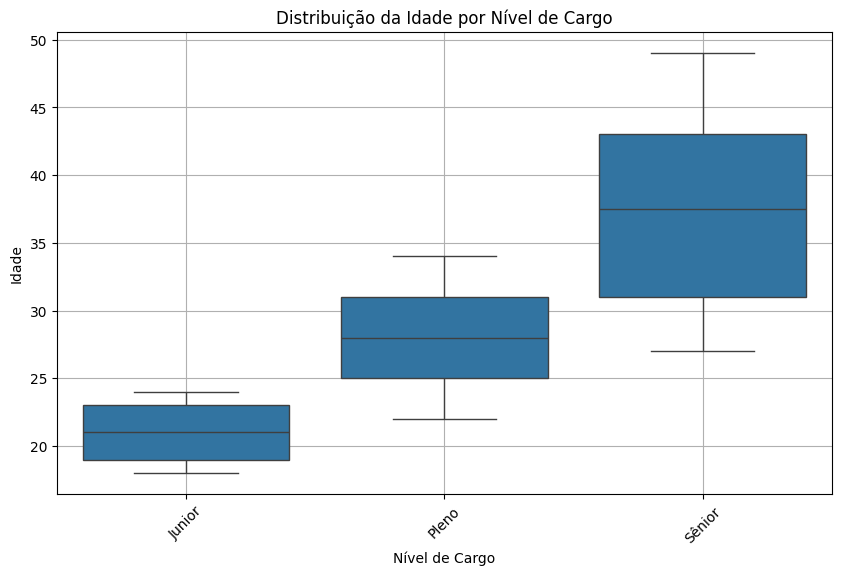

In [30]:



ordem_niveis_cargo = sorted(df['Nivel_Cargo'].unique())

# Criando o gráfico de caixas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.boxplot(data=df, x='Nivel_Cargo', y='Idade', order=ordem_niveis_cargo)
plt.title('Distribuição da Idade por Nível de Cargo')
plt.xlabel('Nível de Cargo')
plt.ylabel('Idade')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.grid(True)  # Adiciona grade ao gráfico para facilitar a visualização
plt.show()


# Treinamendo ML

In [31]:
df_pediram_a_conta.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.0,1
5,2022-05-25,2024-05-14,24,43,4.328231,3.209761,Sênior,10466.00,14.0,1
7,2023-08-18,2024-05-14,9,30,1.086755,1.908626,Pleno,6058.88,14.0,1
12,2022-03-26,2024-05-14,26,28,2.733115,1.820046,Pleno,7252.12,6.0,1
20,2022-10-22,2024-05-14,19,27,4.123725,4.465835,Pleno,7359.37,2.0,1


In [103]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00


In [104]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from category_encoders import OrdinalEncoder
from sklearn.metrics import roc_auc_score, f1_score
from xgboost import XGBClassifier
import optuna
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeRegressor
import xgboost as xgb

In [108]:
df.columns


Index(['Data_Contratacao', 'Data_Desligamento', 'Meses_de_Servico', 'Idade',
       'Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Nivel_Cargo', 'Salario',
       'Horas_Extras', 'Desligamento'],
      dtype='object')

In [109]:
# Separate features and target
Xtrain = df.drop(['Desligamento'], axis=1)
ytrain = df['Desligamento']

# Define the columns to encode
columns_to_encode = ['Data_Contratacao', 'Data_Desligamento', 'Meses_de_Servico', 'Idade',
       'Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Nivel_Cargo', 'Salario',
       'Horas_Extras']

def objective(trial):
        learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        subsample = trial.suggest_float('subsample', 0.5, 1, step=0.1)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1, step=0.1)
        min_child_weight = trial.suggest_int('min_child_weight', 1, 10)

        avg_roc = 0
        avg_f1 = 0
        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        for tr, ts in kf.split(Xtrain, ytrain):
            Xtr, Xvl = Xtrain.iloc[tr], Xtrain.iloc[ts]
            ytr, yvl = ytrain.iloc[tr], ytrain.iloc[ts]

            encoder = OrdinalEncoder(cols=columns_to_encode)
            Xtr = encoder.fit_transform(Xtr)
            Xvl = encoder.transform(Xvl)

            scale_pos_weight = ytr.value_counts()[0] / ytr.value_counts()[1]

            mdl = XGBClassifier(n_estimators=1000, learning_rate=learning_rate,
                                max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree,
                                min_child_weight=min_child_weight, scale_pos_weight=scale_pos_weight,
                                random_state=0, n_jobs=-1)
        mdl.fit(Xtr, ytr)
        p = mdl.predict_proba(Xvl)[:, 1]
        avg_roc += roc_auc_score(yvl, p)

        f1_66_th = np.percentile(p, 100 - 67)
        avg_f1 += f1_score(yvl, p > f1_66_th)

        print('avg roc:', avg_roc / 5)
        print('avg f1:', avg_f1 / 5)
        return avg_roc / 5

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2024-05-22 09:13:34,259] A new study created in memory with name: no-name-bd32b4d7-5983-49f6-bf06-0f00444d7113
[I 2024-05-22 09:13:34,815] Trial 0 finished with value: 0.2 and parameters: {'learning_rate': 0.02260707761193653, 'max_depth': 2, 'subsample': 0.5, 'colsample_bytree': 0.9, 'min_child_weight': 8}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:35,370] Trial 1 finished with value: 0.2 and parameters: {'learning_rate': 0.006191842605586804, 'max_depth': 2, 'subsample': 0.7, 'colsample_bytree': 0.5, 'min_child_weight': 1}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:35,937] Trial 2 finished with value: 0.2 and parameters: {'learning_rate': 0.01080161637291708, 'max_depth': 9, 'subsample': 0.6, 'colsample_bytree': 0.9, 'min_child_weight': 1}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:36,499] Trial 3 finished with value: 0.2 and parameters: {'learning_rate': 0.005662644092314323, 'max_depth': 1, 'subsample': 0.7, 'colsample_bytree': 0.9, 'min_child_weight': 1}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:37,177] Trial 4 finished with value: 0.2 and parameters: {'learning_rate': 0.003648751028513943, 'max_depth': 6, 'subsample': 1.0, 'colsample_bytree': 0.5, 'min_child_weight': 6}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:37,798] Trial 5 finished with value: 0.2 and parameters: {'learning_rate': 0.002015117841564941, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.8, 'min_child_weight': 8}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:38,393] Trial 6 finished with value: 0.2 and parameters: {'learning_rate': 0.005156616912255793, 'max_depth': 6, 'subsample': 0.6, 'colsample_bytree': 0.7, 'min_child_weight': 5}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:38,950] Trial 7 finished with value: 0.2 and parameters: {'learning_rate': 0.014600637680287576, 'max_depth': 5, 'subsample': 0.5, 'colsample_bytree': 0.9, 'min_child_weight': 2}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:39,470] Trial 8 finished with value: 0.2 and parameters: {'learning_rate': 0.019012932634788118, 'max_depth': 6, 'subsample': 1.0, 'colsample_bytree': 0.8, 'min_child_weight': 6}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:40,039] Trial 9 finished with value: 0.2 and parameters: {'learning_rate': 0.006688906512908339, 'max_depth': 6, 'subsample': 0.6, 'colsample_bytree': 0.6, 'min_child_weight': 9}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:40,570] Trial 10 finished with value: 0.2 and parameters: {'learning_rate': 0.07019680868687166, 'max_depth': 10, 'subsample': 0.9, 'colsample_bytree': 1.0, 'min_child_weight': 10}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.2


[I 2024-05-22 09:13:41,176] Trial 11 finished with value: 0.2 and parameters: {'learning_rate': 0.036407573556651994, 'max_depth': 1, 'subsample': 0.8, 'colsample_bytree': 0.5, 'min_child_weight': 4}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:41,874] Trial 12 finished with value: 0.2 and parameters: {'learning_rate': 0.0012767379551174318, 'max_depth': 3, 'subsample': 0.5, 'colsample_bytree': 0.7, 'min_child_weight': 8}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:43,449] Trial 13 finished with value: 0.2 and parameters: {'learning_rate': 0.027345796617254073, 'max_depth': 3, 'subsample': 0.8, 'colsample_bytree': 1.0, 'min_child_weight': 3}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1045045045045045


[I 2024-05-22 09:13:45,315] Trial 14 finished with value: 0.2 and parameters: {'learning_rate': 0.057649179460599866, 'max_depth': 2, 'subsample': 0.5, 'colsample_bytree': 0.6, 'min_child_weight': 7}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1008695652173913


[I 2024-05-22 09:13:45,986] Trial 15 finished with value: 0.2 and parameters: {'learning_rate': 0.0024229990095982227, 'max_depth': 4, 'subsample': 0.7, 'colsample_bytree': 0.6, 'min_child_weight': 4}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:46,528] Trial 16 finished with value: 0.19999999999999998 and parameters: {'learning_rate': 0.00877853620580656, 'max_depth': 1, 'subsample': 0.9, 'colsample_bytree': 0.8, 'min_child_weight': 8}. Best is trial 0 with value: 0.2.


avg roc: 0.19999999999999998
avg f1: 0.1008695652173913


[I 2024-05-22 09:13:47,082] Trial 17 finished with value: 0.2 and parameters: {'learning_rate': 0.03002307574789291, 'max_depth': 4, 'subsample': 0.6, 'colsample_bytree': 0.7, 'min_child_weight': 10}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:47,619] Trial 18 finished with value: 0.2 and parameters: {'learning_rate': 0.015538791966486805, 'max_depth': 8, 'subsample': 0.8, 'colsample_bytree': 0.9, 'min_child_weight': 5}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1


[I 2024-05-22 09:13:48,180] Trial 19 finished with value: 0.2 and parameters: {'learning_rate': 0.08964807133533388, 'max_depth': 2, 'subsample': 0.5, 'colsample_bytree': 0.5, 'min_child_weight': 7}. Best is trial 0 with value: 0.2.


avg roc: 0.2
avg f1: 0.1008695652173913


In [119]:


# Separate features and target
Xtrain = df.drop(['Desligamento'], axis=1)
ytrain = df['Desligamento']

# Define the columns to encode
columns_to_encode = ['Data_Contratacao', 'Data_Desligamento', 'Meses_de_Servico', 'Idade',
                     'Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Nivel_Cargo', 'Salario',
                     'Horas_Extras']

def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1, step=0.1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1, step=0.1)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)

    avg_roc = 0
    avg_f1 = 0
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for tr, ts in kf.split(Xtrain, ytrain):
        Xtr, Xvl = Xtrain.iloc[tr], Xtrain.iloc[ts]
        ytr, yvl = ytrain.iloc[tr], ytrain.iloc[ts]

        encoder = OrdinalEncoder(cols=columns_to_encode)
        Xtr = encoder.fit_transform(Xtr)
        Xvl = encoder.transform(Xvl)

        scale_pos_weight = ytr.value_counts()[0] / ytr.value_counts()[1]

        mdl = XGBClassifier(n_estimators=1000, learning_rate=learning_rate,
                            max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree,
                            min_child_weight=min_child_weight, scale_pos_weight=scale_pos_weight,
                            random_state=0, n_jobs=-1)
        mdl.fit(Xtr, ytr)
        p = mdl.predict_proba(Xvl)[:, 1]

        avg_roc += roc_auc_score(yvl, p)

        f1_66_th = np.percentile(p, 100 - 67)
        avg_f1 += f1_score(yvl, p > f1_66_th)

    avg_roc /= 5
    avg_f1 /= 5
    trial.set_user_attr('avg_f1', avg_f1)
    print('avg roc:', avg_roc)
    print('avg f1:', avg_f1)
    return avg_roc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Melhores hiperparâmetros encontrados
best_params = study.best_trial.params
print("Melhores hiperparâmetros:", best_params)

# Treinando o modelo final com os melhores hiperparâmetros
# Divida os dados em treinamento e teste se você tiver um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42, stratify=ytrain)

# Codificando os dados
encoder = OrdinalEncoder(cols=columns_to_encode)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Ajustando a ponderação da classe
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Treinando o modelo final
final_model = XGBClassifier(n_estimators=1000, learning_rate=best_params['learning_rate'],
                            max_depth=best_params['max_depth'], subsample=best_params['subsample'],
                            colsample_bytree=best_params['colsample_bytree'],
                            min_child_weight=best_params['min_child_weight'],
                            scale_pos_weight=scale_pos_weight,
                            random_state=0, n_jobs=-1)

final_model.fit(X_train_encoded, y_train)

# Avaliando o modelo no conjunto de teste
predictions = final_model.predict_proba(X_test_encoded)[:, 1]
roc = roc_auc_score(y_test, predictions)
f1_threshold = np.percentile(predictions, 100 - 67)
f1 = f1_score(y_test, predictions > f1_threshold)

print(f"ROC AUC no conjunto de teste: {roc}")
print(f"F1 Score no conjunto de teste: {f1}")


[I 2024-05-22 09:34:30,739] A new study created in memory with name: no-name-b75ce5ef-1f0b-4177-a051-db9c35014cee
[I 2024-05-22 09:34:34,594] Trial 0 finished with value: 1.0 and parameters: {'learning_rate': 0.006263248134158838, 'max_depth': 1, 'subsample': 0.9, 'colsample_bytree': 0.9, 'min_child_weight': 8}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.499115179252479


[I 2024-05-22 09:34:37,125] Trial 1 finished with value: 1.0 and parameters: {'learning_rate': 0.009203630656613497, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.5, 'min_child_weight': 6}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4973913043478261


[I 2024-05-22 09:34:40,643] Trial 2 finished with value: 1.0 and parameters: {'learning_rate': 0.0026993436617498224, 'max_depth': 5, 'subsample': 0.5, 'colsample_bytree': 0.5, 'min_child_weight': 10}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4973913043478261


[I 2024-05-22 09:34:42,324] Trial 3 finished with value: 1.0 and parameters: {'learning_rate': 0.004148637171597391, 'max_depth': 7, 'subsample': 1.0, 'colsample_bytree': 1.0, 'min_child_weight': 3}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 1.0


[I 2024-05-22 09:34:44,142] Trial 4 finished with value: 1.0 and parameters: {'learning_rate': 0.00236816634752028, 'max_depth': 6, 'subsample': 0.5, 'colsample_bytree': 0.7, 'min_child_weight': 7}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4973913043478261


[I 2024-05-22 09:34:45,415] Trial 5 finished with value: 1.0 and parameters: {'learning_rate': 0.07531830347568942, 'max_depth': 9, 'subsample': 0.5, 'colsample_bytree': 0.7, 'min_child_weight': 9}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4973913043478261


[I 2024-05-22 09:34:47,502] Trial 6 finished with value: 1.0 and parameters: {'learning_rate': 0.0021402358463076137, 'max_depth': 7, 'subsample': 0.7, 'colsample_bytree': 0.7, 'min_child_weight': 5}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4973913043478261


[I 2024-05-22 09:34:48,929] Trial 7 finished with value: 1.0 and parameters: {'learning_rate': 0.023644952864891277, 'max_depth': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'min_child_weight': 1}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.499115179252479


[I 2024-05-22 09:34:51,818] Trial 8 finished with value: 1.0 and parameters: {'learning_rate': 0.014157316701995602, 'max_depth': 2, 'subsample': 1.0, 'colsample_bytree': 0.9, 'min_child_weight': 4}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.5429297220665964


[I 2024-05-22 09:34:54,111] Trial 9 finished with value: 1.0 and parameters: {'learning_rate': 0.0010927588598897034, 'max_depth': 2, 'subsample': 0.9, 'colsample_bytree': 0.6, 'min_child_weight': 2}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4982608695652174


[I 2024-05-22 09:34:55,419] Trial 10 finished with value: 1.0 and parameters: {'learning_rate': 0.04208332998028614, 'max_depth': 1, 'subsample': 0.7, 'colsample_bytree': 1.0, 'min_child_weight': 8}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.5435676455289167


[I 2024-05-22 09:34:57,393] Trial 11 finished with value: 1.0 and parameters: {'learning_rate': 0.006700683096224239, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.5, 'min_child_weight': 6}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4973913043478261


[I 2024-05-22 09:34:58,805] Trial 12 finished with value: 1.0 and parameters: {'learning_rate': 0.010007614772255802, 'max_depth': 4, 'subsample': 0.8, 'colsample_bytree': 0.9, 'min_child_weight': 7}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4973913043478261


[I 2024-05-22 09:35:00,242] Trial 13 finished with value: 1.0 and parameters: {'learning_rate': 0.01812765042649006, 'max_depth': 9, 'subsample': 0.9, 'colsample_bytree': 0.8, 'min_child_weight': 6}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4973913043478261


[I 2024-05-22 09:35:01,748] Trial 14 finished with value: 1.0 and parameters: {'learning_rate': 0.006142692237693671, 'max_depth': 8, 'subsample': 0.9, 'colsample_bytree': 0.9, 'min_child_weight': 8}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4973913043478261


[I 2024-05-22 09:35:05,589] Trial 15 finished with value: 1.0 and parameters: {'learning_rate': 0.0076960470254215305, 'max_depth': 5, 'subsample': 0.6, 'colsample_bytree': 0.6, 'min_child_weight': 10}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4973913043478261


[I 2024-05-22 09:35:07,201] Trial 16 finished with value: 1.0 and parameters: {'learning_rate': 0.00422792006546665, 'max_depth': 1, 'subsample': 0.8, 'colsample_bytree': 0.6, 'min_child_weight': 5}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4973913043478261


[I 2024-05-22 09:35:08,566] Trial 17 finished with value: 1.0 and parameters: {'learning_rate': 0.032033053588280985, 'max_depth': 10, 'subsample': 0.9, 'colsample_bytree': 0.8, 'min_child_weight': 8}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4973913043478261


[I 2024-05-22 09:35:09,962] Trial 18 finished with value: 1.0 and parameters: {'learning_rate': 0.012379873145974045, 'max_depth': 4, 'subsample': 0.7, 'colsample_bytree': 0.9, 'min_child_weight': 7}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4982608695652173


[I 2024-05-22 09:35:12,167] Trial 19 finished with value: 1.0 and parameters: {'learning_rate': 0.004104578014948427, 'max_depth': 7, 'subsample': 0.6, 'colsample_bytree': 0.5, 'min_child_weight': 4}. Best is trial 0 with value: 1.0.


avg roc: 1.0
avg f1: 0.4973913043478261
Melhores hiperparâmetros: {'learning_rate': 0.006263248134158838, 'max_depth': 1, 'subsample': 0.9, 'colsample_bytree': 0.9, 'min_child_weight': 8}
ROC AUC no conjunto de teste: 1.0
F1 Score no conjunto de teste: 0.5


In [114]:
import optuna.visualization as vis

In [115]:
fig = vis.plot_optimization_history(study)
fig.show()

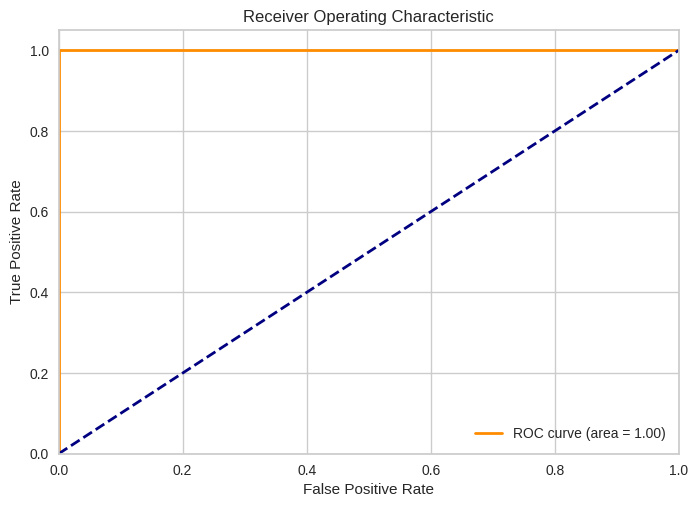

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculando a curva ROC
fpr, tpr, _ = roc_curve(y_test, predictions)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


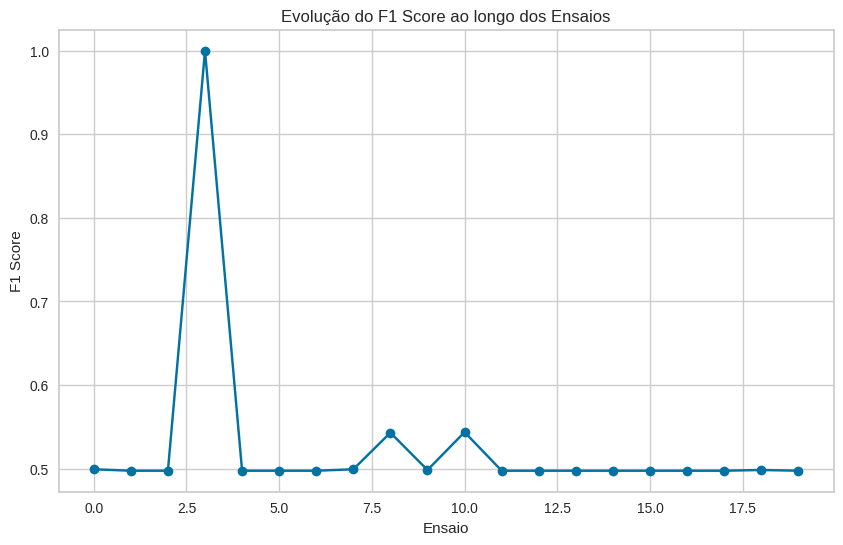

In [120]:
 #Extraindo os resultados dos ensaios de F1 Score
f1_scores = [trial.user_attrs['avg_f1'] for trial in study.trials]

# Plotando o gráfico da evolução do F1 Score
plt.figure(figsize=(10, 6))
plt.plot(f1_scores, marker='o')
plt.xlabel('Ensaio')
plt.ylabel('F1 Score')
plt.title('Evolução do F1 Score ao longo dos Ensaios')
plt.grid(True)
plt.show()